# Neural Networks for Fashion Image Classification and Visual Search
## BT5153 Applied Machine Learning Group Project
Authors: Fengzi Li (A0206468Y) | Shashi Kant (A0206456E) | Shunichi Araki (A0206507L) | Sumer Bangera (A0206510X) | Swapna Samir Shukla (A0206512U)*

*All authors are graduate students of MSBA program Class of 2020 at NUS Business School.
This Notebook searving for: Image Classification

## 1. Loading Kaggle dataset

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "samir3112" # username from the json file
os.environ['KAGGLE_KEY'] = "e61cbc91f88c15e7aeec659e79fb6fee" # key from the json file

In [2]:
! kaggle datasets download -d paramaggarwal/fashion-product-images-small

 99% 561M/565M [00:09<00:00, 38.4MB/s]
100% 565M/565M [00:09<00:00, 64.6MB/s]


In [3]:
! unzip 'fashion-product-images-small.zip' 

Streaming output truncated to the last 5000 lines.
  inflating: myntradataset/images/58131.jpg  
  inflating: myntradataset/images/58132.jpg  
  inflating: myntradataset/images/58133.jpg  
  inflating: myntradataset/images/58135.jpg  
  inflating: myntradataset/images/58136.jpg  
  inflating: myntradataset/images/58137.jpg  
  inflating: myntradataset/images/58138.jpg  
  inflating: myntradataset/images/58139.jpg  
  inflating: myntradataset/images/5814.jpg  
  inflating: myntradataset/images/58140.jpg  
  inflating: myntradataset/images/58141.jpg  
  inflating: myntradataset/images/58143.jpg  
  inflating: myntradataset/images/58144.jpg  
  inflating: myntradataset/images/58145.jpg  
  inflating: myntradataset/images/58146.jpg  
  inflating: myntradataset/images/58147.jpg  
  inflating: myntradataset/images/58148.jpg  
  inflating: myntradataset/images/58149.jpg  
  inflating: myntradataset/images/5815.jpg  
  inflating: myntradataset/images/58150.jpg  
  inflating: myntradataset/imag

In [4]:
DATASET_PATH = "/content/myntradataset/"
print(os.listdir(DATASET_PATH))


['styles.csv', 'images']


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## 2. Data Exploration

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random
from multiprocessing import Pool
from keras_preprocessing.image import ImageDataGenerator

In [7]:
styles = pd.read_csv('styles.csv',error_bad_lines=False)
styles.head(20)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


In [8]:
styles.shape

(44424, 10)

In [9]:
styles.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [10]:
styles.dtypes

id                      int64
gender                 object
masterCategory         object
subCategory            object
articleType            object
baseColour             object
season                 object
year                  float64
usage                  object
productDisplayName     object
dtype: object

image name = 19009.jpg, image size = (80, 60, 3), image data type = uint8


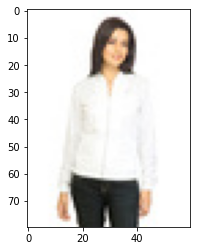

In [11]:
# get basic information of image
fname = random.choice([x for x in os.listdir('images')
               if os.path.isfile(os.path.join('images', x))])
image = mping.imread('images/' + fname)
plt.imshow(image)
print('image name = {}, image size = {}, image data type = {}'.format(fname, image.shape, image.dtype))

In [12]:
# count total number of images
path, dirs, files = next(os.walk('images'))
image_count = len(files)
print('Total number of images = {}, Total number of ID in styles = {}'.format(image_count, styles.shape[0]))

Total number of images = 44441, Total number of ID in styles = 44424


In [0]:
# mapping between images and styles.csv
from multiprocessing import Pool
   
p = Pool(5) # process 5 images simultaneously

image_name = []
for x in os.listdir('images'):
  if os.path.isfile:
    image_path = os.path.join('images', x)
    image_name.append(os.path.basename(image_path))

In [14]:
image_name[:3]

['4006.jpg', '17917.jpg', '53619.jpg']

In [15]:
# convert list to integer
image_number = [i.split('.')[0] for i in image_name]
image_number = [int(i) for i in image_number]
image_number = pd.DataFrame(image_number, columns = ['id'])
image_number.head(3)

,id
0,4006
1,17917
2,53619


In [16]:
# inner join styles dataframe and image_number in images folder
styles_image = pd.merge(styles, image_number, how='inner', on = 'id')
print('Inner joint styles and images dataframe size = {}'.format(styles_image.shape))

Inner joint styles and images dataframe size = (44419, 10)


In [0]:
# add in image name column for ImageDataGenerator
styles_image['image_name'] = styles_image.apply(lambda row: str(row['id']) + '.jpg', axis = 1)

In [18]:
# missing data in styles_image dataframe
styles_image.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
image_name              0
dtype: int64

Text(0, 0.5, 'Count of products')

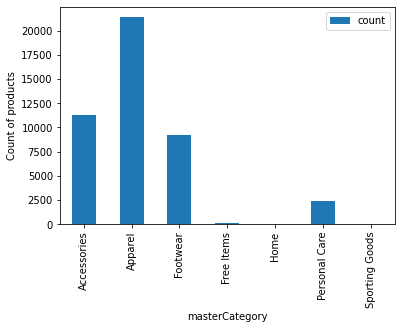

In [19]:
styles_image.groupby(['masterCategory'])['id'].agg(['count']).plot(kind = 'bar')
plt.ylabel('Count of products')

In [20]:
styles_image.groupby(['masterCategory', 'subCategory'])['id'].agg(['count'])

count
masterCategory subCategory                    
Accessories    Accessories                 129
               Bags                       3055
               Belts                       811
               Cufflinks                   108
               Eyewear                    1073
               Gloves                       20
               Headwear                    293
               Jewellery                  1079
               Mufflers                     38
               Perfumes                      1
               Scarves                     118
               Shoe Accessories             24
               Socks                       686
               Sports Accessories            3
               Stoles                       90
               Ties                        258
               Umbrellas                     6
               Wallets                     933
               Watches                    2542
               Water Bottle                  7
Apparel        Apparel Set                 106
               Bottomwear                 2693
               Dress                       478
               Innerwear                  1808
               Loungewear and Nightwear    470
               Saree                       427
               Socks                        12
               Topwear                   15398
Footwear       Flip Flops                  913
               Sandal                      963
               Shoes                      7343
Free Items     Free Gifts                  104
               Vouchers                      1
Home           Home Furnishing               1
Personal Care  Bath and Body                12
               Beauty Accessories            4
               Eyes                         43
               Fragrance                  1011
               Hair                         19
               Lips                        527
               Makeup                      307
               Nails                       329
               Perfumes                      5
               Skin                         69
               Skin Care                    77
Sporting Goods Sports Equipment             21
               Wristbands                    4

In [21]:
# illustrate different masterCategory
sample_list = styles_image.groupby(['masterCategory']).apply(lambda x: x.sample(n=5, replace=True))
sample_list

id  ... image_name
masterCategory               ...           
Accessories    26310   8513  ...   8513.jpg
               36506  32001  ...  32001.jpg
               29903  29030  ...  29030.jpg
               42621   4708  ...   4708.jpg
               31864  17309  ...  17309.jpg
Apparel        265     7355  ...   7355.jpg
               42710  36323  ...  36323.jpg
               39288  50553  ...  50553.jpg
               9827   13596  ...  13596.jpg
               1729   25925  ...  25925.jpg
Footwear       31580  56954  ...  56954.jpg
               19428   2893  ...   2893.jpg
               40537  41444  ...  41444.jpg
               43720   7320  ...   7320.jpg
               20501   8998  ...   8998.jpg
Free Items     1137   45894  ...  45894.jpg
               7383   49718  ...  49718.jpg
               23064  51092  ...  51092.jpg
               25737  29983  ...  29983.jpg
               30043  43286  ...  43286.jpg
Home           12229  40826  ...  40826.jpg
               12229  40826  ...  40826.jpg
               12229  40826  ...  40826.jpg
               12229  40826  ...  40826.jpg
               12229  40826  ...  40826.jpg
Personal Care  43067  43129  ...  43129.jpg
               20790  57716  ...  57716.jpg
               39404  46294  ...  46294.jpg
               6719   55925  ...  55925.jpg
               7847   49147  ...  49147.jpg
Sporting Goods 38299   8426  ...   8426.jpg
               14643   8422  ...   8422.jpg
               29273   2356  ...   2356.jpg
               35070   8427  ...   8427.jpg
               38391   4012  ...   4012.jpg

[35 rows x 11 columns]

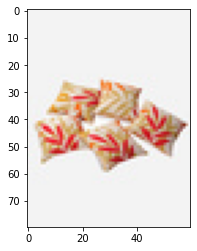

In [22]:

# random select a image to show
samples = []
keys = []
for i in sample_list['id']:
  samples.append(i)
  
j = random.randrange(len(samples))
image = mping.imread('images/' + str(samples[j]) + '.jpg')
plt.imshow(image)

In [23]:
master_cat_name = list(styles_image.groupby(['masterCategory']).groups.keys())
master_cat_name

['Accessories',
 'Apparel',
 'Footwear',
 'Free Items',
 'Home',
 'Personal Care',
 'Sporting Goods']

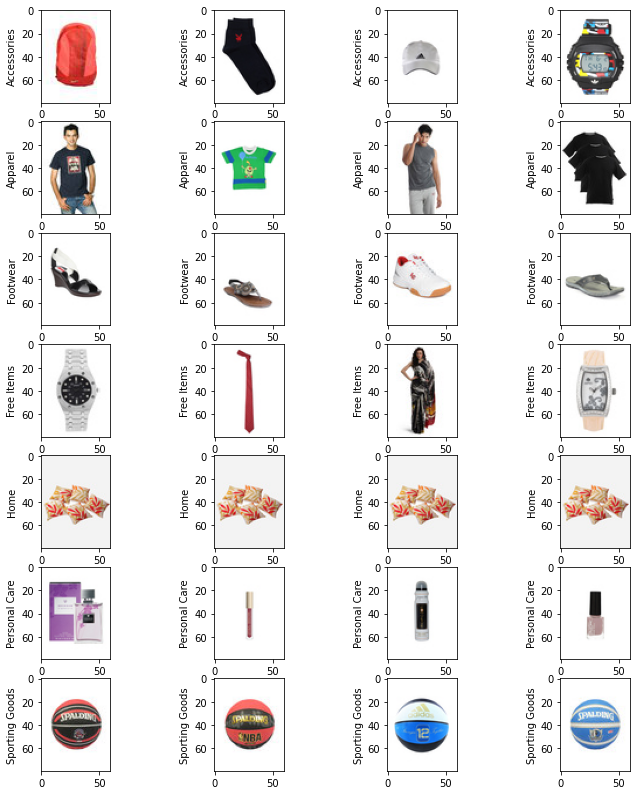

In [24]:
# for each masterCategory randomly select 5 (columns) images for illustration
fig = plt.figure(figsize=(15,14))
columns = 5
rows = 7

for j in range(0, rows):
  for i in range(columns*(j+1)-4, columns*(j+1)):
    image = mping.imread('images/' + str(samples[i-1]) + '.jpg')
    fig.add_subplot(rows, columns, i)
    plt.imshow(image)
    plt.ylabel(str(master_cat_name[j]))
plt.show()

## 3. Selection subset of dataset

#### One schemes to conduct product classification for e-commerce

- by articleType

### 3.1 Selection subset of dataset - By subCategory

As seen from the subcategory groupby dataframe, subcategory item counts vary from Perfumes with only 1 product to Topwear of 15398 products. It is highly imbalanced. We specify a thredhold to filter the main subcategories. ***subCategory with product count >= 500 is considered.***

In [25]:
# Selection of subset of data
styles_image['subcat_count'] = styles_image.groupby(['masterCategory', 'subCategory'])['id'].transform('count')
print(styles_image.shape)
styles_image.head(5)

(44419, 12)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image_name,subcat_count
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,15398
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,2693
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,2542
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,2693
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,15398


In [0]:
subcategory_df_train = styles_image[styles_image['subcat_count'] >= 500].sample(frac=0.8, random_state=123)
subcategory_df_test = styles_image[styles_image['subcat_count'] >= 500].drop(subcategory_df_train.index)
subcategory_num = styles_image[styles_image['subcat_count'] >= 500].shape[0]

Text(0.5, 1.0, 'SubCategory after selection')

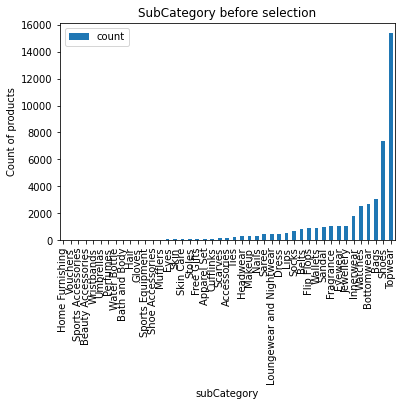

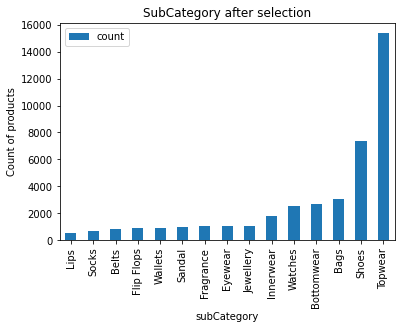

In [27]:
# Product counts for multiclass before clipping and after clipping
# plt.figure(figsize=(10,10))
styles_image.groupby(['subCategory'])['id'].agg(['count']).sort_values('count').plot(kind='bar')
plt.ylabel('Count of products')
plt.title('SubCategory before selection')

styles_image[styles_image['subcat_count'] >= 500].groupby(['subCategory'])['id'].agg(['count']).sort_values('count').plot(kind='bar')
plt.ylabel('Count of products')
plt.title('SubCategory after selection')

### 3.2 Selection subset of dataset - By articleType

As seen from the articleType groupby dataframe, articleType product counts vary from Wristbands with 7 product to Tshirts of 7065 products. It is highly imbalanced. We specify a thredhold to filter the main subcategories. ***articleType with product count >= 200 is considered.***

In [28]:
# Selection of subset of data
styles_image['articleType_count'] = styles_image.groupby(['masterCategory', 'subCategory', 'articleType'])['id'].transform('count')
print(styles_image.shape)
styles_image.head(5)

(44419, 13)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image_name,subcat_count,articleType_count
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,15398,3215
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,2693,608
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,2542,2542
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,2693,304
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,15398,7065


In [29]:
articleType_df_train = styles_image[styles_image['articleType_count'] >= 300].sample(frac=0.8, random_state=123)
articleType_df_test = styles_image[styles_image['articleType_count'] >= 300].drop(articleType_df_train.index)

article_num_select = styles_image[styles_image['articleType_count'] >= 300].groupby(['articleType']).count().iloc[:,0]
articleType_samples = styles_image[styles_image['articleType_count'] >= 300].shape[0]

print('total number of articleType classes after selecton', len(article_num_select))
print('total number of articleType product counts after selecton',article_num_select)

total number of articleType classes after selecton 31
total number of articleType product counts after selecton articleType
Backpacks                 722
Belts                     810
Bra                       477
Briefs                    849
Casual Shoes             2845
Deodorant                 347
Dresses                   462
Earrings                  416
Flats                     500
Flip Flops                913
Formal Shoes              637
Handbags                 1757
Heels                    1323
Jeans                     608
Kurtas                   1844
Lipstick                  315
Nail Polish               329
Perfume and Body Mist     607
Sandals                   895
Sarees                    427
Shirts                   3215
Shorts                    545
Socks                     686
Sports Shoes             2036
Sunglasses               1073
Tops                     1762
Track Pants               304
Trousers                  530
Tshirts                  7065
Wallet

In [30]:
article_num_original = styles_image.groupby(['articleType']).count().iloc[:,0]
print('total number of articleType classes before selecton', len(article_num_original))
print('total number of articleType product counts before selecton', article_num_original)

total number of articleType classes before selecton 142
total number of articleType product counts before selecton articleType
Accessory Gift Set      97
Baby Dolls              16
Backpacks              724
Bangle                  85
Basketballs             13
                      ... 
Waistcoat               15
Wallets                936
Watches               2542
Water Bottle            11
Wristbands               7
Name: id, Length: 142, dtype: int64


Text(0.5, 1.0, 'articleType after selection')

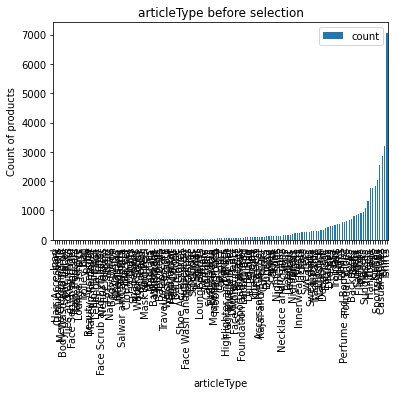

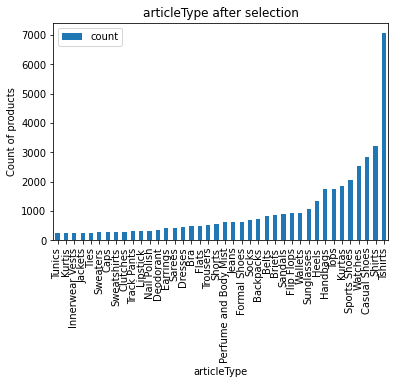

In [31]:
styles_image.groupby(['articleType'])['id'].agg(['count']).sort_values('count').plot(kind='bar')
plt.ylabel('Count of products')
plt.title('articleType before selection')

styles_image[styles_image['articleType_count'] >= 200].groupby(['articleType'])['id'].agg(['count']).sort_values('count').plot(kind='bar')
plt.ylabel('Count of products')
plt.title('articleType after selection')

## 4. Train, Validation and Test split of data set

#### Solving an imbalance class problem for image classification 
- Applying Data Augmentation
- SMOTE (synthetic Minority Over-sampling Technique)
- Weighted Class Approach
- Under-sampling Approach

***Class_weight:***
Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class. For our current problem, it does not show good improvement. To keep a simple model, we will not use this in our proposed model. 

***SMOTE*** function requires input with (samples, features) so we need to reshape original 4D imgage format (samples, height, width, channels) into (samples, height*width*channels) which causes RAM capacity problem.

***Under-sampling*** can not make full use of available dataset, we will not use this in our proposed model.

### Data Augmentation and DataGenerator Function

The ImageDataGenerator  class will return just the randomly transformed data. This is to ensure that the network sees “new” images that it has never “seen” before at each and every epoch.

In [34]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 75
HEIGHT = 75
BATCH_SIZE = 32

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',validation_split = 0.2)


train_generator = train_datagen.flow_from_dataframe(
    dataframe=articleType_df_train,
	  directory='images',
    x_col = 'image_name', # image .jpg name
    y_col = 'articleType',
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical',
	   subset = 'training')
    
validation_generator = train_datagen.flow_from_dataframe(
        dataframe=articleType_df_train, #subcategory_df_train,
        directory='images',
        x_col = 'image_name',
        y_col = 'articleType', #'subCategory',  #'articleType', #'masterCategory',
        target_size = (HEIGHT, WIDTH),
        batch_size = BATCH_SIZE,
        shuffle = True,
        class_mode = 'categorical',
        subset = 'validation')
        #seed=123

Found 24176 validated image filenames belonging to 31 classes.
Found 6043 validated image filenames belonging to 31 classes.


### 4.1 subCategory Classification

Class_weight: Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class

### 4.2 articleType Classification

## 5. Transfer Learning using Inception V3

In [0]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import models
from keras import layers
from keras import optimizers

In [36]:
CLASSES = 31
    
# setup model
base_model = InceptionV3(weights='imagenet', include_top=False,input_shape = (75, 75, 3))

# transfer learning
last_layer = base_model.get_layer('mixed7') #Only use layers including and above 'mixed7'
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = GlobalAveragePooling2D(name='avg_pool')(last_output)
x = Dropout(0.4)(x)
x=Dense(512, activation="relu")(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
   

rmsprop = optimizers.RMSprop(lr=0.0001)      
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

87916544/87910968 [==============================] - 88s 1us/step
last layer output shape:  (None, 3, 3, 768)


#### Regularization Technique
- parameter norm penalities: but properties change when combined with other regularizers
- early stopping: always do this
- weight sharing: already done implicitly through convolution
- drop-out: (almost) always used
- data augmentation: always do this; select technique apropos to source and application
- noise injection: more common for RNNs
- batch normalization: try and see if it helps. more often but not always

## 6. articleType Classification Model

### 6.1 Model Training

In [37]:
import time
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
save_model_name = 'inception_transfer_articleType.h5'
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
best_model = ModelCheckpoint(save_model_name, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, epsilon=1e-4, mode='min')

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [38]:
start = time.time()
inception_history = model.fit_generator(train_generator, steps_per_epoch=len(train_generator.filenames) // BATCH_SIZE,
                                            epochs=50,
                                            validation_data=validation_generator,
                                            validation_steps=len(validation_generator.filenames) // BATCH_SIZE, # class_weight = class_weights,
                                            callbacks=[earlyStopping,reduce_lr_loss]) 
elapsed = time.time() - start
print('Computation time = ' + str(round(elapsed,2)) + 's')

Epoch 1/50
755/755 [==============================] - 116s 153ms/step - loss: 1.4830 - accuracy: 0.5732 - val_loss: 0.5744 - val_accuracy: 0.7593
Epoch 2/50
755/755 [==============================] - 96s 127ms/step - loss: 0.6721 - accuracy: 0.7744 - val_loss: 0.3377 - val_accuracy: 0.8150
Epoch 3/50
755/755 [==============================] - 96s 127ms/step - loss: 0.5435 - accuracy: 0.8157 - val_loss: 0.7938 - val_accuracy: 0.8390
Epoch 4/50
755/755 [==============================] - 96s 127ms/step - loss: 0.4851 - accuracy: 0.8348 - val_loss: 1.0164 - val_accuracy: 0.8516
Epoch 5/50
755/755 [==============================] - 96s 127ms/step - loss: 0.4446 - accuracy: 0.8475 - val_loss: 0.4807 - val_accuracy: 0.8578
Epoch 6/50
755/755 [==============================] - 95s 126ms/step - loss: 0.4199 - accuracy: 0.8561 - val_loss: 0.2252 - val_accuracy: 0.8609
Epoch 7/50
755/755 [==============================] - 95s 126ms/step - loss: 0.3923 - accuracy: 0.8633 - val_loss: 0.6154 - val_a

In [0]:
# plot train and valid loss history

def plot_acc_loss(history):
    # plot train and valid loss history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epoch_number = range(len(acc))
    plt.figure(figsize=(6, 6), dpi=100)
    plt.subplot(2,1,1)
    plt.plot(epoch_number, acc, 'r', label='train acc')
    plt.plot(epoch_number, val_acc, 'b', label='val acc')
    plt.title('Train and Validation Accuracy')
    plt.legend()

    plt.subplot(2,1,2)
    plt.plot(epoch_number, loss, 'r', label='train loss')
    plt.plot(epoch_number, val_loss, 'b', label='val loss')
    plt.title('Train and Validation Loss')
    plt.legend()

    plt.show()

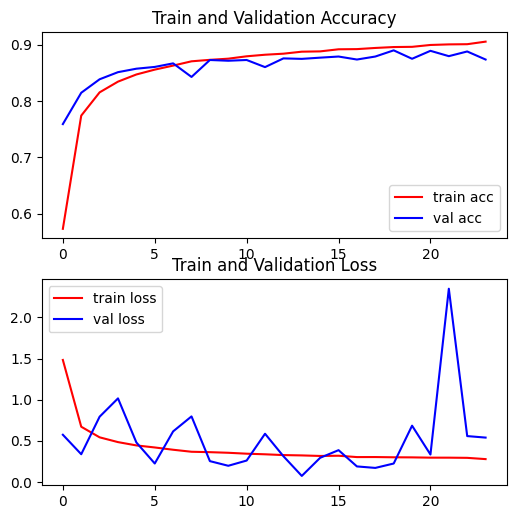

In [40]:
# plot train and valid loss history 
valid_acc_plot = plot_acc_loss(inception_history)

In [41]:
# evaluate model, return loss & metrics values in the test mode
model.evaluate(validation_generator)

189/189 [==============================] - 12s 62ms/step


[0.39072385430336, 0.8755584955215454]

In [42]:
# getting validation fitting results
valid_fit = model.predict(validation_generator)
valid_fit.shape

(6043, 31)

In [0]:
# calculate the prediction class result
import math

def pred_class(input_probs):
  class_top1 = []
  index_top1 = np.argmax(input_probs, axis = 1)
  class_top1 = (index_top1 + 1)
  return class_top1

def acc_cal(pred, truth):
  accuracy_class = int((pred == truth).sum())/ int(len(truth))
  return accuracy_class

def truth_labels(generator, batch_size):
    number_of_examples = len(generator.filenames)
    number_of_generator_calls = math.ceil(number_of_examples / (1.0 * batch_size))
    labels_list = []
    for i in range(0,int(number_of_generator_calls)):
        labels_list.extend(np.array(generator[i][1]))
    return labels_list

In [44]:
# actual results instead of multiple class prediction
valid_labels = truth_labels(validation_generator, BATCH_SIZE)

valid_top1 = pred_class(valid_fit)
y_val_truth = pred_class(valid_labels)
acc_valid = acc_cal(valid_top1, y_val_truth)

print('Validation accuracy and prediction')
print(valid_top1.shape, y_val_truth.shape, acc_valid)

import random
mask = random.sample(range(0, len(validation_generator.filenames)), 24)
print(valid_top1[mask])
print(y_val_truth[mask])

Validation accuracy and prediction
(6043,) (6043,) 0.8744001323845771
[19 28 12 25 29 26  5 21  4 26 21 10  5 14  2 21 31  5 15 11 24 21 29 21]
[19 14 12 25 29 26 13 21  4 21 21 10  5 14  2 21 31  5 15 11 24 21 29 21]


In [49]:
image_generator_test = ImageDataGenerator()

test_generator = image_generator_test.flow_from_dataframe(
        dataframe = articleType_df_test, #subcategory_df_test,
        directory = 'images',
        x_col = 'image_name',
        y_col = 'articleType', #'subCategory',   #'articleType', #'masterCategory',
        target_size = (75,75),
        batch_size = BATCH_SIZE,
        shuffle = True,
        class_mode = 'categorical'
        #seed=123
    )
# prediction for test dataset
test_pred = model.predict(test_generator)

Found 7555 validated image filenames belonging to 31 classes.


In [50]:
# actual results instead of multiple class prediction # test_pred - test_labels - test_pred - test_labels 
test_labels = truth_labels(test_generator, BATCH_SIZE)

test_top1 = pred_class(test_pred)
y_test_truth = pred_class(test_labels)
acc_test = acc_cal(test_top1, y_test_truth)

print('Test accuracy and prediction')
print(test_top1.shape, y_test_truth.shape, acc_test)

import random
mask = random.sample(range(0, len(test_generator.filenames)), 24)
print(test_top1[mask])
print(y_test_truth[mask])

Test accuracy and prediction
(7555,) (7555,) 0.18769027134348115
[29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29]
[24 31 26 31  5 31  5  5 10 12 29 10 31 26 12 26  5 21 19 13 29 24 29 29]


### References:
[1] Dataset source:

https://www.kaggle.com/paramaggarwal/fashion-product-images-small

[2] image_generator:

https://www.kaggle.com/paramaggarwal/fashion-product-images-classifier

https://keras.io/preprocessing/image/

[3] How can i predict images(outside dataset) using VGG16 with keras after training?

https://stackoverflow.com/questions/59331348/how-can-i-predict-imagesoutside-dataset-using-vgg16-with-keras-after-training

[4] How to Classify Fashion Images easily using ConvNets

https://medium.com/nanonets/how-to-classify-fashion-images-easily-using-convnets-81e1e0019ffe

[5] Transfer Learning in Keras with Computer Vision Models

https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/

[6] How to use SMOTE for dealing with imbalanced image dataset for solving classification problems

https://medium.com/swlh/how-to-use-smote-for-dealing-with-imbalanced-image-dataset-for-solving-classification-problems-3aba7d2b9cad

[7] 2. Over-sampling

https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html

[8] Machine Learning — Multiclass Classification with Imbalanced Dataset

https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a